In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [5]:
#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize

import emcee
print(emcee.__version__)

import corner

Populating the interactive namespace from numpy and matplotlib
3.0rc2


In [6]:
#------parameters--------
A = 1.7e3
alpha = -3.0
beta = -3.2
gamma = -2.5
ells = np.arange(384) #corresponds to nside of 128
freqs = np.linspace(30, 300, 10)*1.e9
input_params = [A, alpha, beta, gamma]
#create a filepath to store different power spectra
filepath = '/Users/alex/Documents/foreground_moments/power_spectra/'

In [ ]:
def chi2(params, ells, freqs, data):
    chi2=0
    A, alpha, beta, gamma = params
    model = ff.model(ells, freqs, params)
    
    var = np.zeros((len(freqs),len(ells)))
    for ell in range(len(ells)):
        var[:,ell] = 2/(2*ell+1)
    cosmic_var = var * model**2
    
    #don't count the first 30 ell in the objective function.
    chi2 = (data[:,30:] - model[:,30:])**2 / cosmic_var[:,30:]
    return np.sum(chi2)

In [11]:
#make some data
# start=time.time()
# data = ff.ps_data(ells, freqs, input_params)
# save(filepath + 'reference_ps.npy', data)
# print(time.time()-start)
data = load(filepath + 'reference_ps.npy')

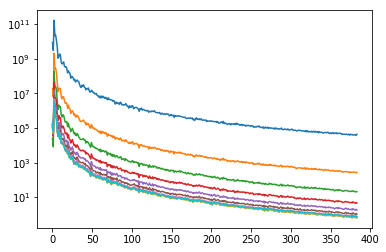